In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

In [37]:
def SplitData(data, split_ratio):
    # Determine number of validation data
    datanum = len(data)
    validation_num = int(datanum * (1.0 - split_ratio))

    # Randomly shuffle the data and select the indices for validation set
    indices = list(range(datanum))
    random.shuffle(indices)

    # Select the validation and training data based on shuffled indices
    validation_indices = indices[:validation_num]
    training_indices = indices[validation_num:]

    # Create the training and validation datasets using the indices
    validation_data = data[validation_indices]
    training_data = data[training_indices]

    return training_data, validation_data

In [38]:
test_datalist = pd.read_csv("data_validation.csv").to_numpy()
training_datalist  = pd.read_csv("data_train.csv").to_numpy()
np.random.shuffle(training_datalist)

In [39]:
def modify(datalist, y_num=0):

    kiwi = datalist.T
    x = kiwi[:-6].T
    y = kiwi[-6:]

    ones_column = np.ones((x.shape[0], 1))
    x_modify = np.hstack((x, x**0.5, np.arctan(x) ,ones_column))

    return x_modify, y[y_num].T

In [40]:
def Regression(datalist , y_num = 0, num_iteration = 20000,learning_rate = 0.00000001,output = False):
    x,y = modify(datalist , y_num)
    w = np.zeros(len(x[0]))
    # Gradient Descent
    m = len(y)  # Number of data points
    for iteration in range(num_iteration):
        y_pred = x.dot(w)
        error = y_pred - y
        gradient = (1 / m) * x.T.dot(error)
        w -= learning_rate * gradient
        if(output):
          if iteration % (num_iteration / 100) == 0:
            print(np.sum(error))
            print(gradient)
            print(w)
            cost = (1 / float(2 * m)) * np.sum(error ** 2)
            print(f"Iteration {iteration}, Cost: {cost}\n")
    return w

In [41]:
def MatrixApproach(datalist , y_num = 0):
    x,y = modify(datalist , y_num)
    xTx = np.matmul(x.T , x)
    xTx_inv = np.linalg.inv(xTx)
    kiwi = np.matmul(xTx_inv,x.T)
    w = np.matmul(kiwi , y)
    return w

In [42]:
def MakePrediction(w, datalist):
    x , y = modify(datalist)
    prediction = x.dot(w)
    return prediction

def Calc_MAPE(prediction , ground_truth):
    MAPE = 0.0
    ll = len(prediction)
    if(ll != len(ground_truth)):
        print("Oh no")
    for i in range(ll):
        if(ground_truth[i] == 0):
            continue
        MAPE += abs ( prediction[i] - ground_truth[i] ) / ground_truth[i] / ll
    return MAPE

def Calc_MAE(prediction , ground_truth):
    MAE = 0.0
    ll = len(prediction)
    if(ll != len(ground_truth)):
        print("Oh no")
    for i in range(ll):
        if(ground_truth[i] == 0):
            continue
        MAE += abs ( prediction[i] - ground_truth[i] )  / ll
    return MAE

In [43]:
def AQI_calculator(O3, PM25, PM10, CO, SO2, NO2):
  table_of_AQI  = [0, 51, 101, 151, 201, 301, 401]          
  table_of_O3  = [0, 55, 125, 165, 205, 405, 505]       #ppb
  table_of_PM25 = [0, 15.5, 35.5, 54.5, 150.5, 250.5, 350.5]  #ug/m3   
  table_of_PM10 = [0, 51, 101, 255, 355, 425, 505]       #ug/m3
  table_of_CO  = [0, 4.5, 9.5, 12.5, 15.5, 30.5, 40.5]    #ppm
  table_of_SO2  = [0, 21, 76, 186, 305, 605, 805]       #ppb
  table_of_NO2  = [0, 31, 101, 361, 650, 1250, 1650]     #ppb
  O3_AQI = 0
  PM25_AQI = 0
  PM10_AQI = 0
  CO_AQI = 0
  SO2_AQI = 0
  NO2_AQI = 0
  for i in range (6):
    if table_of_O3[i] <= O3 < table_of_O3[i+1]:
      O3_AQI = table_of_AQI[i] + (O3 - table_of_O3[i])*(table_of_AQI[i+1] - table_of_AQI[i])/(table_of_O3[i+1] - table_of_O3[i])
    if table_of_PM25[i] <= PM25 < table_of_PM25[i+1]:
      PM25_AQI = table_of_AQI[i] + (PM25 - table_of_PM25[i])*(table_of_AQI[i+1] - table_of_AQI[i])/(table_of_PM25[i+1] - table_of_PM25[i])
    if table_of_PM10[i] <= PM10 < table_of_PM10[i+1]:
      PM10_AQI = table_of_AQI[i] + (PM10 - table_of_PM10[i])*(table_of_AQI[i+1] - table_of_AQI[i])/(table_of_PM10[i+1] - table_of_PM10[i])
    if table_of_CO[i] <= CO < table_of_CO[i+1]:
      CO_AQI = table_of_AQI[i] + (CO - table_of_CO[i])*(table_of_AQI[i+1] - table_of_AQI[i])/(table_of_CO[i+1] - table_of_CO[i])
    if table_of_SO2[i] <= SO2 < table_of_SO2[i+1]:
      SO2_AQI = table_of_AQI[i] + (SO2 - table_of_SO2[i])*(table_of_AQI[i+1] - table_of_AQI[i])/(table_of_SO2[i+1] - table_of_SO2[i])
    if table_of_NO2[i] <= NO2 < table_of_NO2[i+1]:
      NO2_AQI = table_of_AQI[i] + (NO2 - table_of_NO2[i])*(table_of_AQI[i+1] - table_of_AQI[i])/(table_of_NO2[i+1] - table_of_NO2[i])
  AQI = max(O3_AQI, PM25_AQI, PM10_AQI, CO_AQI, SO2_AQI, NO2_AQI)
  if(AQI > 500): AQI = 500
  return int(AQI)

In [44]:
y_title = ["next_O3","next_PM2.5","next_PM10","next_CO","next_SO2","next_NO2"]
w_list =[]
w_list_matrix = []
for i in range(6):
    print('training',y_title[i],'...')
    w_m = MatrixApproach(training_datalist , i)
    w = Regression(training_datalist , i, num_iteration = 20000,learning_rate = 0.000001,output = True)
    w_list.append(w)
    w_list_matrix.append(w_m)

training next_O3 ...
-1465990.2000000002
[-7.36809322e+02 -5.87927447e+01 -9.83576542e+00 -2.76552411e+00
 -5.03511113e+01 -3.30687822e+02 -3.81378839e+02 -1.21915739e+03
 -9.59076341e+02 -4.85096376e+02 -5.21431709e+00 -2.21921509e+03
 -5.30954906e+01 -6.15576301e+01 -3.78498648e+03 -3.76396338e+03
 -8.06114793e+01 -6.32305532e+01 -1.50090249e+02 -4.27007717e+01
 -1.71738099e+01 -8.88381407e+00 -3.55148937e+01 -9.86063766e+01
 -1.05848529e+02 -1.90028588e+02 -1.65418517e+02 -1.16668344e+02
 -2.76489744e+00 -2.61212971e+02 -3.87217638e+01 -4.36865789e+01
 -3.14667348e+02 -3.13654214e+02 -4.83311639e+01 -4.25227645e+01
 -4.73723945e+01 -3.36405594e+01 -9.39517051e+00 -2.74662101e+00
 -2.55111410e+01 -4.51458749e+01 -4.56478938e+01 -4.77121025e+01
 -4.71873554e+01 -4.54151931e+01 -1.69076876e+00 -4.83169076e+01
 -2.92586405e+01 -3.42106535e+01 -4.82707747e+01 -4.82422595e+01
 -3.47181345e+01 -3.14425709e+01 -3.10479319e+01]
[7.36809322e-04 5.87927447e-05 9.83576542e-06 2.76552411e-06
 5.

In [45]:
pred_list ={}
matrix_list ={}
truth_list = {}

for i in range(6):
    w = w_list[i]
    w_m = w_list_matrix[i]
    temp, truth = modify(test_datalist,i)
    pred = MakePrediction(w,test_datalist)
    pred_m = MakePrediction(w_m,test_datalist)

    pred_list[y_title[i]] = pred
    matrix_list[y_title[i]] = pred_m
    truth_list[y_title[i]] = truth

    print(y_title[i], '(MAE:' ,  Calc_MAE(pred , truth) , '):')
    print(y_title[i], '(MAE(matrix):' ,  Calc_MAE(pred_m , truth) , '):')

ll = len(pred_list["next_O3"])
pred_list["next_AQI"] = []
matrix_list["next_AQI"] = []
truth_list["next_AQI"] = []

for i in range(ll):
    aqi_val = AQI_calculator(pred_list["next_O3"][i] ,pred_list["next_PM2.5"][i] ,pred_list["next_PM10"][i] ,pred_list["next_CO"][i] ,pred_list["next_SO2"][i] ,pred_list["next_NO2"][i] )
    aqi_val_m = AQI_calculator(matrix_list["next_O3"][i] ,matrix_list["next_PM2.5"][i] ,matrix_list["next_PM10"][i] ,matrix_list["next_CO"][i] ,matrix_list["next_SO2"][i] ,matrix_list["next_NO2"][i] )
    truth = AQI_calculator(truth_list["next_O3"][i] ,truth_list["next_PM2.5"][i] ,truth_list["next_PM10"][i] ,truth_list["next_CO"][i], truth_list["next_SO2"][i] , truth_list["next_NO2"][i] )
    
    pred_list["next_AQI"].append(aqi_val)
    matrix_list["next_AQI"].append(aqi_val_m)
    truth_list["next_AQI"].append(truth)


next_O3 (MAE: 4.092891435538431 ):
next_O3 (MAE(matrix): 3.6993880098247365 ):
next_PM2.5 (MAE: 2.3705705689653573 ):
next_PM2.5 (MAE(matrix): 2.192474490473514 ):
next_PM10 (MAE: 3.486910191697354 ):
next_PM10 (MAE(matrix): 3.2516531905887205 ):
next_CO (MAE: 0.05438271707049353 ):
next_CO (MAE(matrix): 0.04983969379665043 ):
next_SO2 (MAE: 0.6398647725198879 ):
next_SO2 (MAE(matrix): 0.2355448511370592 ):
next_NO2 (MAE: 2.0634133408193773 ):
next_NO2 (MAE(matrix): 1.7106283971664245 ):


In [46]:
copy_list ={}
strawberry = [7 , 9 , 8 , 2 , 12 , 5]

for i in range(6):
    temp, truth = modify(test_datalist,i)
    copy = test_datalist.T[strawberry[i]]
    print(copy)
    copy_list[y_title[i]] = copy.copy()
    print('Copy of',y_title[i], '(MAE:' ,  Calc_MAE(copy , truth) , '):')

ll = len(copy_list["next_O3"])
copy_list["next_AQI"] = []
for i in range(ll):
    aqi_val = AQI_calculator(copy_list["next_O3"][i] ,copy_list["next_PM2.5"][i] ,copy_list["next_PM10"][i] ,copy_list["next_CO"][i] ,copy_list["next_SO2"][i] ,copy_list["next_NO2"][i] )
    copy_list["next_AQI"].append(aqi_val)



[41.2 48.4 56.7 ... 59.1 57.2 54.5]
Copy of next_O3 (MAE: 4.08372403278062 ):
[15. 17. 26. ... 28. 31. 35.]
Copy of next_PM2.5 (MAE: 2.605889079473979 ):
[33. 37. 36. ... 58. 50. 58.]
Copy of next_PM10 (MAE: 3.7351438917476467 ):
[0.33 0.29 0.27 ... 0.44 0.41 0.41]
Copy of next_CO (MAE: 0.06167905469792213 ):
[0.9 0.9 0.9 ... 1.5 1.5 1.8]
Copy of next_SO2 (MAE: 0.21225462168859388 ):
[9.3 8.1 6.5 ... 8.4 7.3 7.5]
Copy of next_NO2 (MAE: 1.7811892510005556 ):


pred AQI MAE 5.6357918810747405
matrix AQI MAE 5.366876310272382
copy AQI MAE 6.003621116828514


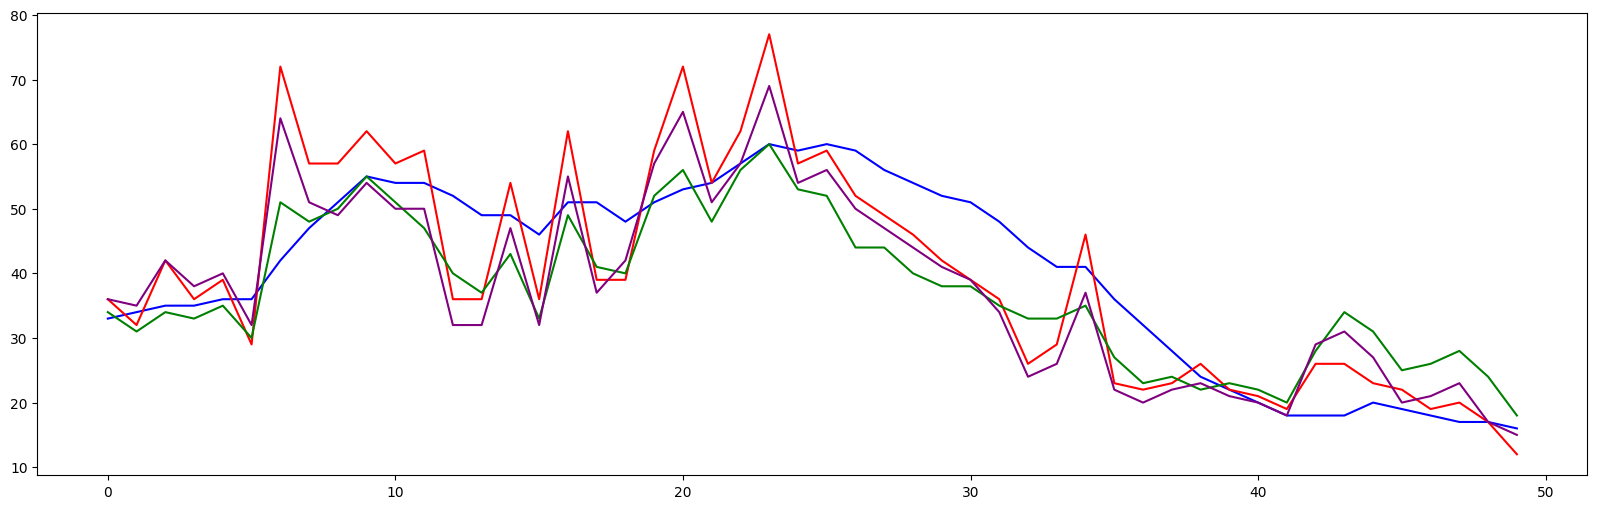

In [50]:
print('pred AQI MAE' , Calc_MAE(pred_list["next_AQI"] , truth_list["next_AQI"]))
print('matrix AQI MAE' , Calc_MAE(matrix_list["next_AQI"] , truth_list["next_AQI"]))
print('copy AQI MAE' , Calc_MAE(copy_list["next_AQI"] , truth_list["next_AQI"]))


# print('pred AQI MAPE' , Calc_MAPE(pred_list["next_AQI"] , truth_list["next_AQI"]))
# print('matrix AQI MAE' , Calc_MAPE(matrix_list["next_AQI"] , truth_list["next_AQI"]))
# print('copy AQI MAPE' , Calc_MAPE(copy_list["next_AQI"] , truth_list["next_AQI"]))


start = 1000
plt.figure(figsize=(20,6))
plt.plot(truth_list["next_AQI"][start:start+50] , 'b')
plt.plot( copy_list["next_AQI"][start:start+50] , 'r')
plt.plot( pred_list["next_AQI"][start:start+50] , 'g')
plt.plot( matrix_list["next_AQI"][start:start+50] , 'purple')
plt.show()



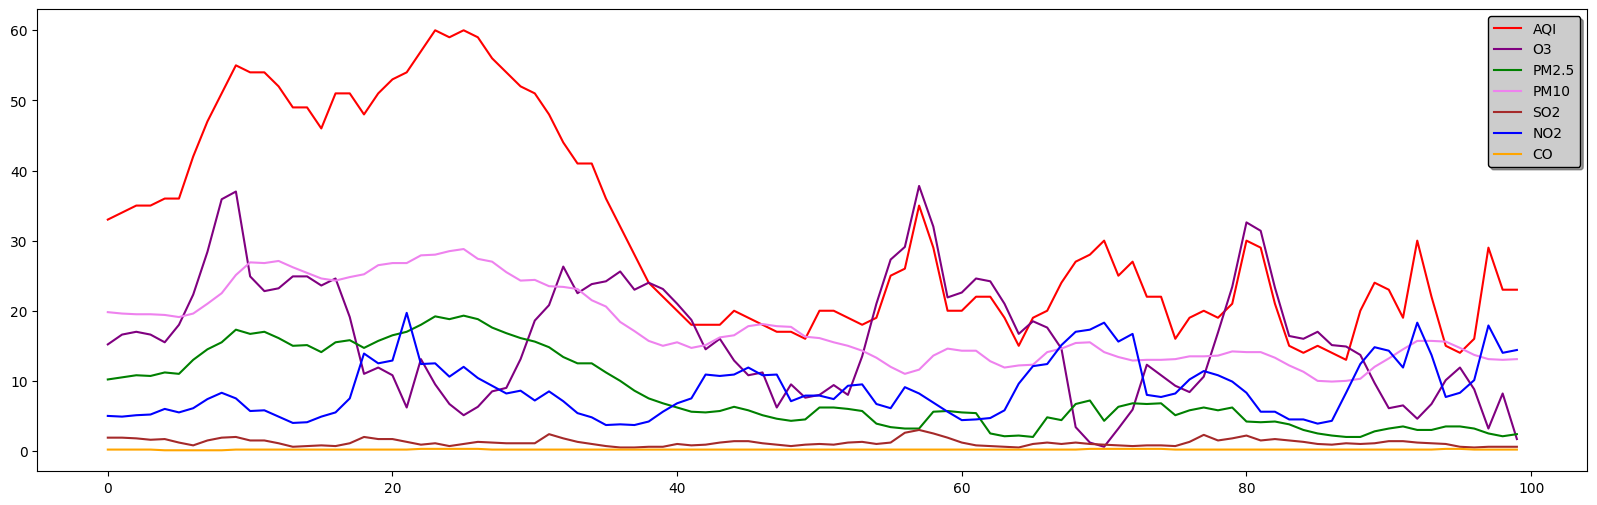

In [48]:
start = 1000
plt.figure(figsize=(20,6))
plt.plot(truth_list["next_AQI"][start:start+100] , label = 'AQI' ,  color = 'red')
plt.plot(truth_list["next_O3"][start:start+100] , label = 'O3' , color = 'purple')
plt.plot(truth_list["next_PM2.5"][start:start+100] , label = 'PM2.5' , color ='green')
plt.plot(truth_list["next_PM10"][start:start+100] , label = 'PM10' , color = 'violet')
plt.plot(truth_list["next_SO2"][start:start+100] , label = 'SO2' , color = 'brown')
plt.plot(truth_list["next_NO2"][start:start+100] , label = 'NO2' , color = 'blue')
plt.plot(truth_list["next_CO"][start:start+100] , label = 'CO' , color = 'orange')
plt.legend(
    loc='best',
    shadow=True,
    facecolor='#ccc',
    edgecolor='#000')
plt.show()